## Forex Xgboost
Unknown where I am failing
Keeping low number of estimators, 10 with over 200,000 rows of data, trains and test well; fails when presented with data it has never seen. The intial train acts as though its overfitting but I am failling to understand that with only 10 estimators.

Import all the libraries

In [19]:
# multiclass classification
import pandas as pd
import xgboost
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.externals import joblib
from xgboost import plot_importance

### Confusion Matrix Function

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Load the data and encode the Y's

In [21]:
# load data
data = pd.read_csv('bigdata.csv')
#data = data[['open','close','high', 'low', 'SEMA', 'LEMA', 'EMACD','TM']]
#data = (data - data.mean()) / (data.max() - data.min())
print(data.head())
dataset = data.values
# split data into X and y
X = dataset[:,2:13]
Y = dataset[:,15]
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
Y = label_encoder.transform(Y)

   Unnamed: 0         RateDateTime     open     high      low    close  \
0           0  2016-01-04 00:00:00  1.08794  1.08794  1.08783  1.08783   
1           1  2016-01-04 00:01:00  1.08783  1.08784  1.08764  1.08764   
2           2  2016-01-04 00:02:00  1.08764  1.08822  1.08764  1.08822   
3           3  2016-01-04 00:03:00  1.08822  1.08822  1.08804  1.08805   
4           4  2016-01-04 00:04:00  1.08805  1.08805  1.08782  1.08796   

          delta      RSI      SEMA      LEMA         EMACD       SMA  \
0  1.757744e-07  50.0096  1.087830  1.087830  0.000000e+00  1.087830   
1 -1.900000e-04  50.0096  1.087734  1.087735 -6.333333e-07  1.087735   
2  5.800000e-04  50.0096  1.087899  1.087898  1.748459e-06  1.087897   
3 -1.700000e-04  50.0096  1.087938  1.087936  2.067170e-06  1.087935   
4 -9.000000e-05  50.0096  1.087943  1.087941  1.766542e-06  1.087940   

        LMA  MACD       TM  class  
0  1.087830   0.0  0.00159      1  
1  1.087735   0.0  0.00173      1  
2  1.087897   

### Train test split
XGB Classifier set to only have 10 estimators

In [22]:
seed = 7
test_size = 0.33
#X_train, X_test, y_train, y_test = train_test_split(X, label_encoded_y, test_size=test_size, random_state=seed)
train, test, train_labels, test_labels = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = xgboost.XGBClassifier(max_depth=10,
                min_child_weight=2,
                subsample=.8,
                colsample_bytree=.99,
                n_estimators=10,
                learning_rate=.3)

In [23]:
print('Fitting model ...')
model.fit(train, train_labels)

Fitting model ...


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.99,
       gamma=0, learning_rate=0.3, max_delta_step=0, max_depth=10,
       min_child_weight=2, missing=None, n_estimators=10, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

## Performs well on the train test split data
This reads as though its overfitting even though I am feeding it test data

In [24]:
print('Predicting new values..')
y_pred = model.predict(test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Predicting new values..
Accuracy: 72.50%


In [25]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, y_pred)
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[35133 16257]
 [12000 39380]]


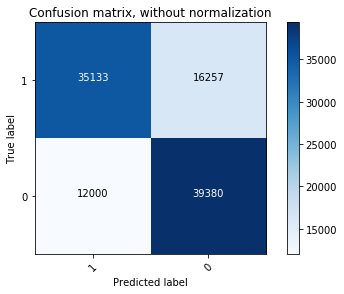

In [26]:
# Plot non-normalized confusion matrix
plt.figure()
class_names = [1,0]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

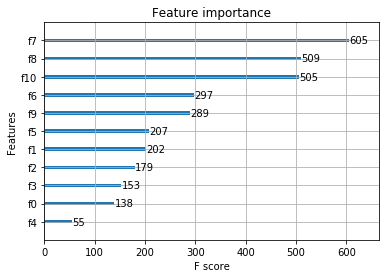

In [27]:
plot_importance(model)
plt.show()

## Pull in unseen data set and predict

In [33]:
data = pd.read_csv('bigdata2.csv', header=0)
# data = (data - data.mean()) / (data.max() - data.min())
dataset = data.values
# split data into X and y
X = dataset[300:,2:13]
Y = dataset[300:,15]
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
Y = label_encoder.transform(Y)
print ("test error:")
pred_test = model.predict(X)
print(np.sqrt(np.mean((pred_test - Y)**2)))

test error:
0.688936294301


## Results of unseen data
Confirm that something is not right

Confusion matrix, without normalization
[[10941  2313]
 [10401  3132]]


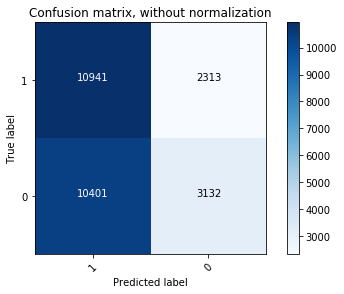

In [32]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y, pred_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = [1,0]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

In [30]:
# evaluate predictions
accuracy = accuracy_score(Y, pred_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 52.23%
